## Wine Quality

Two data sets using samples of red and white Portuguese wine Vinho Verde.<br>

Each expert rated the quality of the wine
from 0 (very poor) to 10 (very excellent).<br>

Number of copies: red wine - 1599;<br>
white wine - 4898.<br>

Number of attributes: 11 + output attribute

1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulfates<br>
11 - alcohol<br>
12 - quality (rating from 0 to 10) - Output variable (based on sensory data).


##Качество вина

Два набора данных с использованием образцов красного и белого португальского вина "Винью Верде".<br>
Каждый эксперт оценил качество вина
от 0 (очень плохое) до 10 (очень отличное).<br>

Количество экземпляров: красное вино - 1599;
белое вино - 4898.<br>

Количество атрибутов: 11 + выходной атрибут<br>
  
   1 - фиксированная кислотность<br>
   2 - летучая кислотность<br>
   3 - лимонная кислота<br>
   4 - остаточный сахар<br>
   5 - хлориды<br>
   6 - свободный диоксид серы<br>
   7 - общий диоксид серы<br>
   8 - плотность<br>
   9 - рН<br>
   10 - сульфаты<br>
   11 - спирт<br>
   12 - качество (оценка от 0 до 10) - Выходная переменная (на основе сенсорных данных)

###Необходимо:
— Провести первичный анализ данных: изучить типы переменных, наличие пропусков, статистические характеристики.

— Визуализировать распределение количественных переменных с помощью гистограмм и box plot.

— Построить столбчатые диаграммы для анализа распределения категориальных переменных.

— Сделать выводы о качестве данных и потенциальных взаимосвязях.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [ ]:
red_wine=pd.read_csv("winequality-red.csv", sep=";")
white_wine=pd.read_csv("winequality-white.csv", sep=";")

In [ ]:
# Проведем первичный анализ дата сета с красными винами
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
red_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


1. Данные состоят из 1599 наблюдений (строк) и 11 переменных (столбцов).
2. Все переменные, кроме 'quality', имеют тип float64, что означает, что они
содержат непрерывные числовые значения.
3. Переменная 'quality' имеет тип int64, что указывает на то, что она может представлять собой категориальные или дискретные значения.
4. Нет пропущенных значений в данных, так как для каждой переменной количество non-null значений равно общему количеству наблюдений (1599).
5. Переменная 'quality' является целевой переменной (зависимой переменной), которую нужно предсказывать или анализировать в зависимости от других переменных.  


In [ ]:
sorted(red_wine['quality'].unique())

[3, 4, 5, 6, 7, 8]

In [ ]:
red_wine['quality'].value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

Вина получили оценки качества от 3 (наинизшая) до 8 (наивысшая), при шкале качество от 0 до 10.
Ни одно из вин не получило наивысшей оценки в 10 баллов.
Также не нашлось вина с самым плохим качеством, которому бы поставили от 0 до 2 баллов.
Более 2/3 вина получии оценки 5 и 6, что является средней оценкой качества (5,6 - также подтверждает информация, выведенная ниже).  

In [ ]:
red_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Средний показатель содержания алкоголя - 10.4 оборота, минимальный - 8.4, максимальный - 14.9

In [ ]:
red_wine.duplicated().sum()

240

Имеем 240 дубликатов!

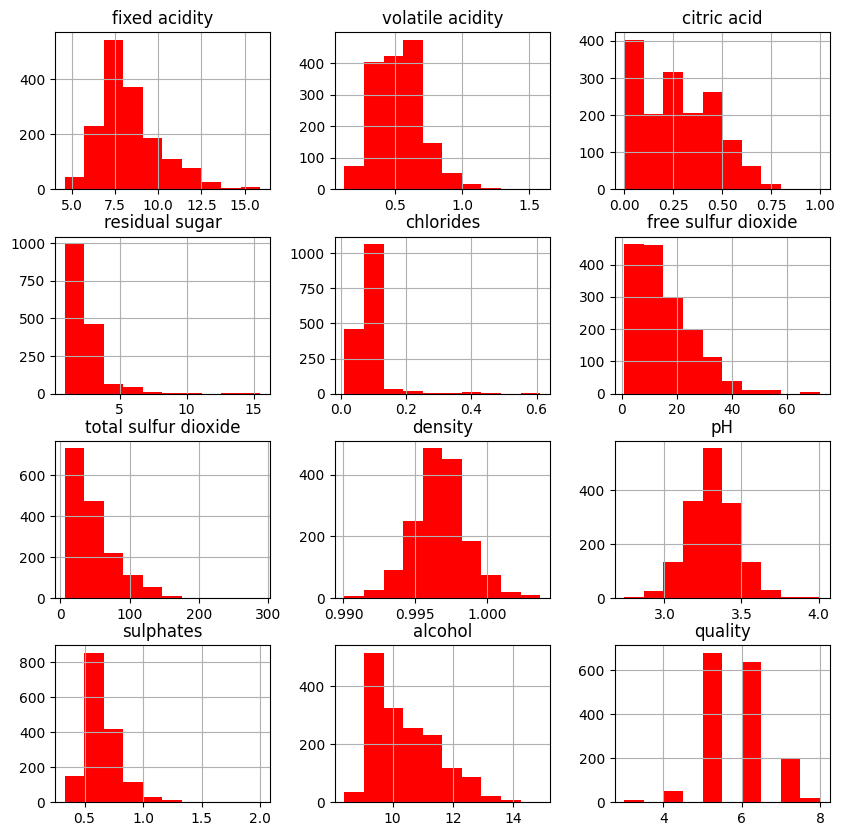

In [ ]:
# Визуализируем распределение количественных переменных
red_wine.hist(color='red',figsize=(10,10));

Летучая кислотность в натуральном вине не должна превышать 0,8-1 г/л.

In [ ]:
# Определим непрерывные признаки (летучая кислотность, сахар, плотность, кислотность, спирт)
continuous_features = ['volatile acidity', 'residual sugar', 'density', 'pH', 'alcohol']

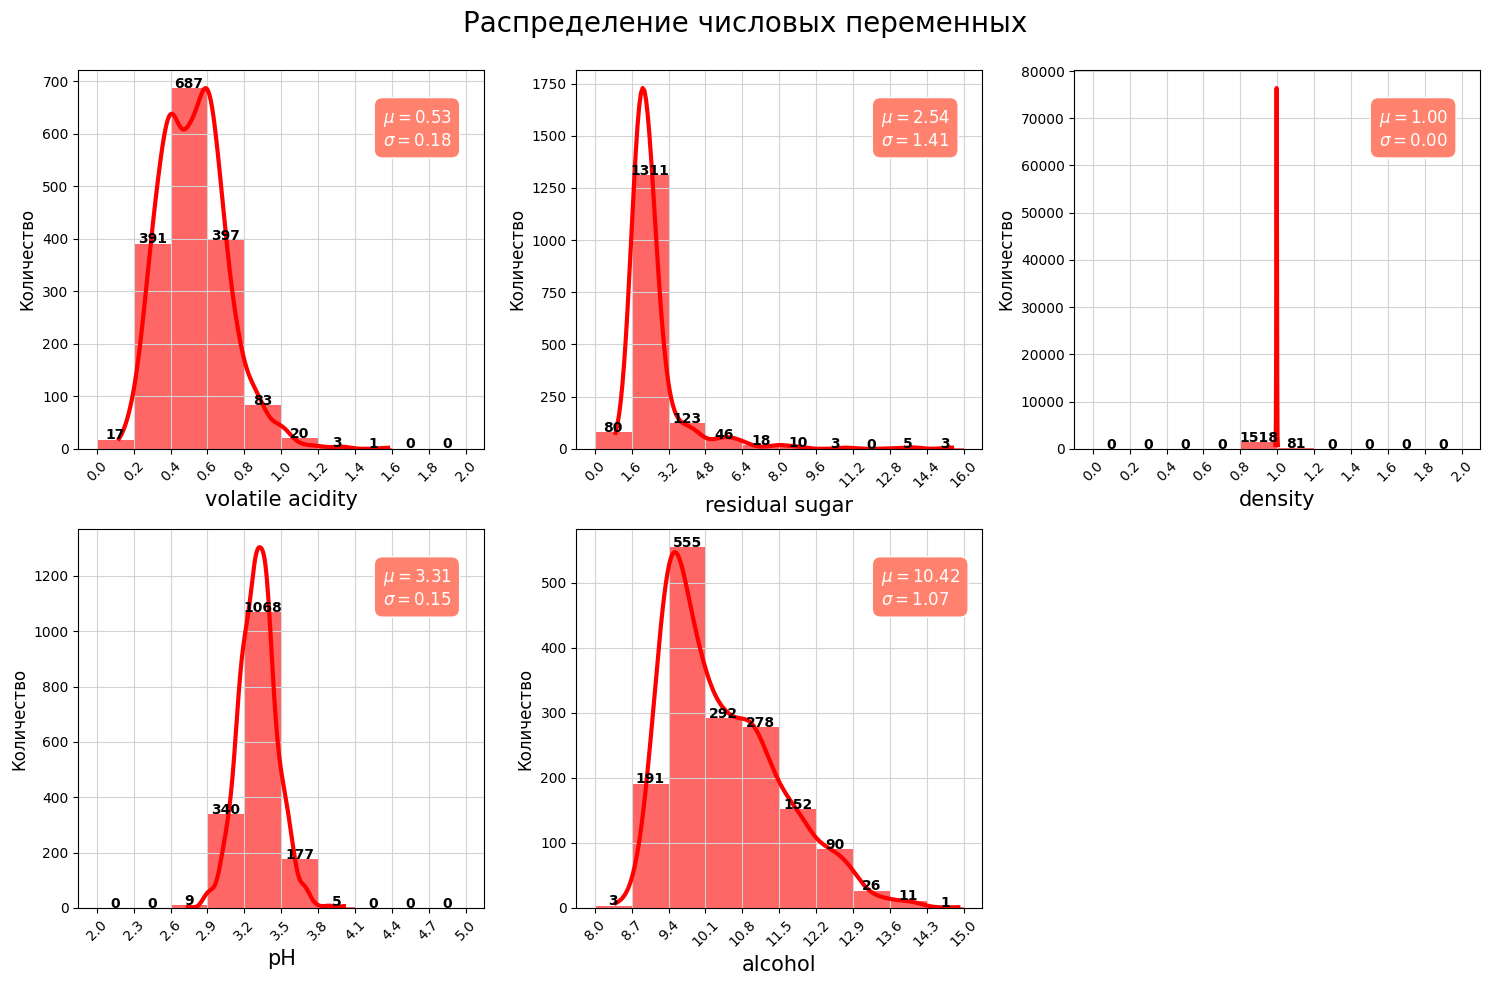

In [ ]:
# для непрерывных данных используем гистограммы и boxplot, чтобы получить представление о распределении каждого объекта
df_continuous = red_wine[continuous_features]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.histplot(data=df_continuous, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

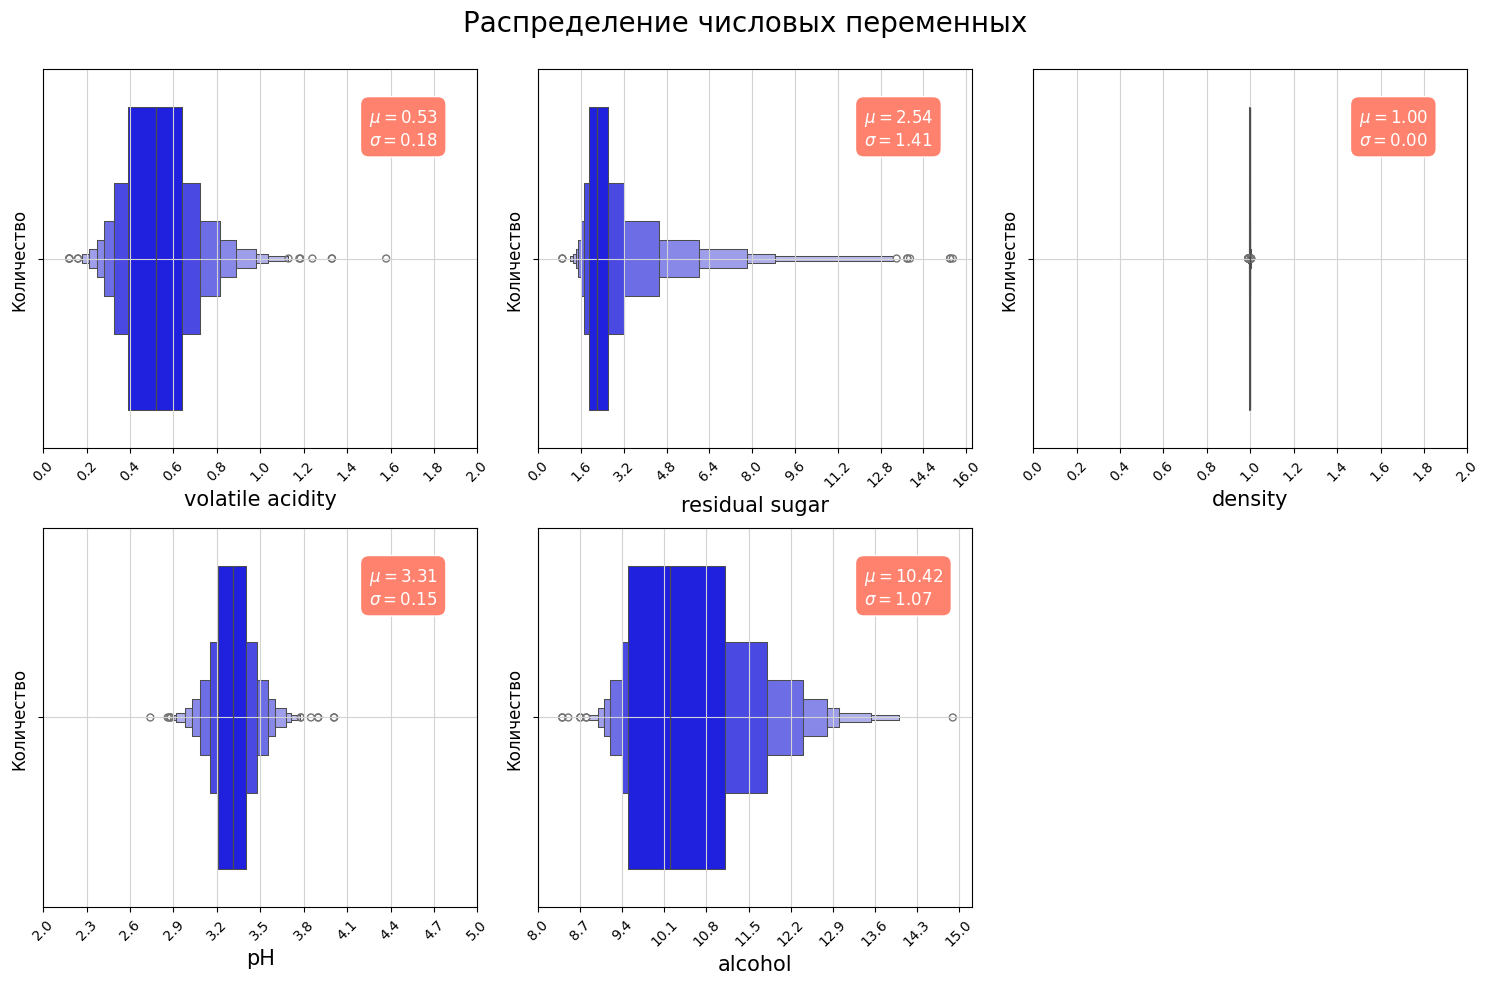

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого непрерывного признака
for i, col in enumerate(df_continuous.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous[col],
                                     range=(np.floor(df_continuous[col].min()), np.ceil(df_continuous[col].max())))

    graph = sns.boxenplot(data=df_continuous, x=col, ax=ax[x, y],
                         color='blue')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')


    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous[col].mean(),
        r'$\sigma=%.2f$' % df_continuous[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

1. Первый график слева вверху показывает распределение переменной "volatile acidity" (Летучая кислотность). Среднее значение µ = 0.53, стандартное отклонение σ = 0.18. Распределение относительно симметричное, с легкой асимметрией вправо, что указывает на наличие превышения допустимого значения 0.8-1 г/л, возможно выброс.

2. Второй график сверху посередине отображает распределение переменной "residual sugar" (остаточный сахар). Среднее значение составляет µ = 2.54, а стандартное отклонение — σ = 1.41. Распределение имеет правостороннюю асимметрию, с некоторым увеличением в области высоких значений (с длинным правым хвостом).

3. Третья диаграмма в верхнем правом углу представляет переменную "density" (плотность). Среднее значение составляет µ = 1, стандартное отклонение — σ = 0. Это необычная ситуация, так как обычно стандартное отклонение больше нуля. В данном случае это означает, что все значения в выборке равны 1 (хотя есть немного значений 0.8), нет разброса.

4. График нижний левый показывает переменную "pH" (кислотность). Здесь среднее µ = 3.31, стандартное отклонение σ = 0.15. Распределение симметричное, соответствующее нормальному распределению.

5. Нижний правый график иллюстрирует переменную "alcohol" (содержание спирта). Среднее значение составляет µ = 10.42, стандартное отклонение — σ = 1.07. Распределение немного скошено вправо, что указывает на большее количество вина с невысоким содержанием спирта.


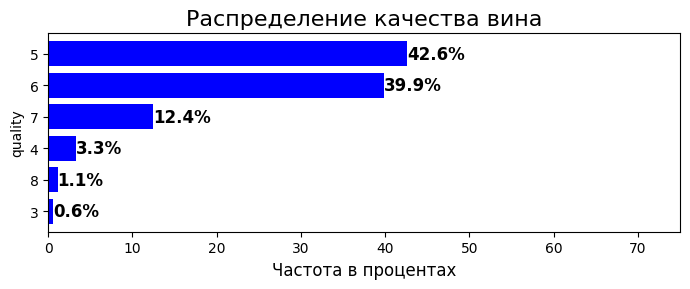

In [ ]:
# анализ категориальных признаков (quality-качество)
# построим столбчатую диаграмму для анализа распределения категориальных переменных

df_categorical = red_wine[['quality']]

# Вычисляем процентные значения
value_counts = df_categorical['quality'].value_counts(normalize=True).mul(100).sort_values()

plt.figure(figsize=(7, 3))
value_counts.plot(kind='barh', width=0.8, color='blue')

# Добавляем процентные значения к столбцам
for index, value in enumerate(value_counts):
    plt.text(value, index, str(round(value, 1)) + '%', fontsize=12, weight='bold', va='center')

plt.xlim([0, 75])
plt.xlabel('Частота в процентах', fontsize=12)
plt.title('Распределение качества вина', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
# Проведем первичный анализ дата сета с красными винами
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


Данные состоят из 4898 наблюдений (строк) и 11 переменных (столбцов).
Все переменные, кроме 'quality', имеют тип float64, что означает, что они содержат непрерывные числовые значения.
Переменная 'quality' имеет тип int64, что указывает на то, что она может представлять собой категориальные или дискретные значения.
Нет пропущенных значений в данных, так как для каждой переменной количество non-null значений равно общему количеству наблюдений (4898).
Переменная 'quality' является целевой переменной (зависимой переменной), которую нужно предсказывать или анализировать в зависимости от других переменных.

In [ ]:
sorted(white_wine['quality'].unique())

[3, 4, 5, 6, 7, 8, 9]

In [ ]:
white_wine['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

In [ ]:
white_wine.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4898.0,6.854788,0.843868,3.80000,6.300000,6.80000,7.3000,14.20000
volatile acidity,4898.0,0.278241,0.100795,0.08000,0.210000,0.26000,0.3200,1.10000
citric acid,4898.0,0.334192,0.121020,0.00000,0.270000,0.32000,0.3900,1.66000
residual sugar,4898.0,6.391415,5.072058,0.60000,1.700000,5.20000,9.9000,65.80000
chlorides,4898.0,0.045772,0.021848,0.00900,0.036000,0.04300,0.0500,0.34600
free sulfur dioxide,4898.0,35.308085,17.007137,2.00000,23.000000,34.00000,46.0000,289.00000
total sulfur dioxide,4898.0,138.360657,42.498065,9.00000,108.000000,134.00000,167.0000,440.00000
density,4898.0,0.994027,0.002991,0.98711,0.991723,0.99374,0.9961,1.03898
pH,4898.0,3.188267,0.151001,2.72000,3.090000,3.18000,3.2800,3.82000
sulphates,4898.0,0.489847,0.114126,0.22000,0.410000,0.47000,0.5500,1.08000


Среди белого вина нашлось с качеством 9, чего не было у красного, но также ни одно из белых вин не получило наивысшей оценки в 10 баллов.
Оценки качества от 3 (наинизшая) до 9 (наивысшая).
Более 3/4 вина получии оценки 5 и 6, что является средней оценкой качества (5.8 - что чуть выше чем у красного вина).

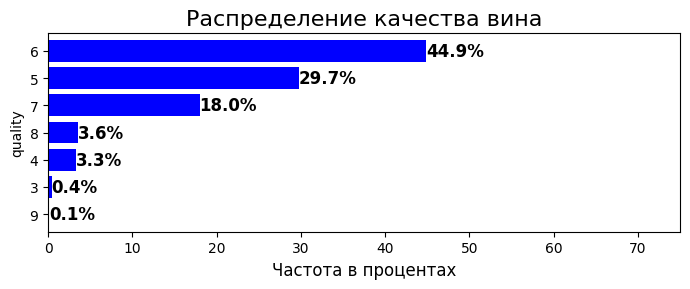

In [ ]:
# Сразу проведем и анализ категориальных признаков (quality-качество)
# построим столбчатую диаграмму для анализа распределения переменной

df_categorical = white_wine[['quality']]

# Вычисляем процентные значения
value_counts = df_categorical['quality'].value_counts(normalize=True).mul(100).sort_values()

plt.figure(figsize=(7, 3))
value_counts.plot(kind='barh', width=0.8, color='blue')

# Добавляем процентные значения к столбцам
for index, value in enumerate(value_counts):
    plt.text(value, index, str(round(value, 1)) + '%', fontsize=12, weight='bold', va='center')

plt.xlim([0, 75])
plt.xlabel('Частота в процентах', fontsize=12)
plt.title('Распределение качества вина', fontsize=16)

plt.tight_layout()
plt.show()

In [ ]:
# проверим дубликаты
white_wine.duplicated().sum()

937

В данном датасете 937 дубликатов!

Если учесть, что наблюдений всего 4898, с четвертью дубликатов нужно разбираться более подробно. Скорее всего - это вина с идентичными параметрами.

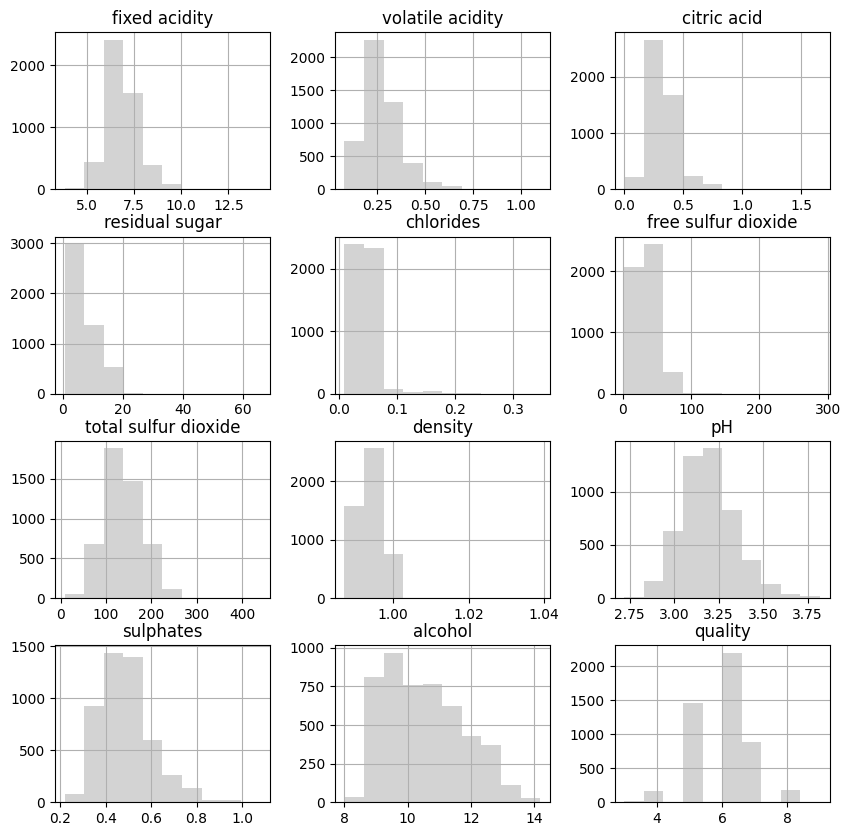

In [ ]:
# Визуализируем распределение количественных переменных
white_wine.hist(color='lightgrey',figsize=(10,10));

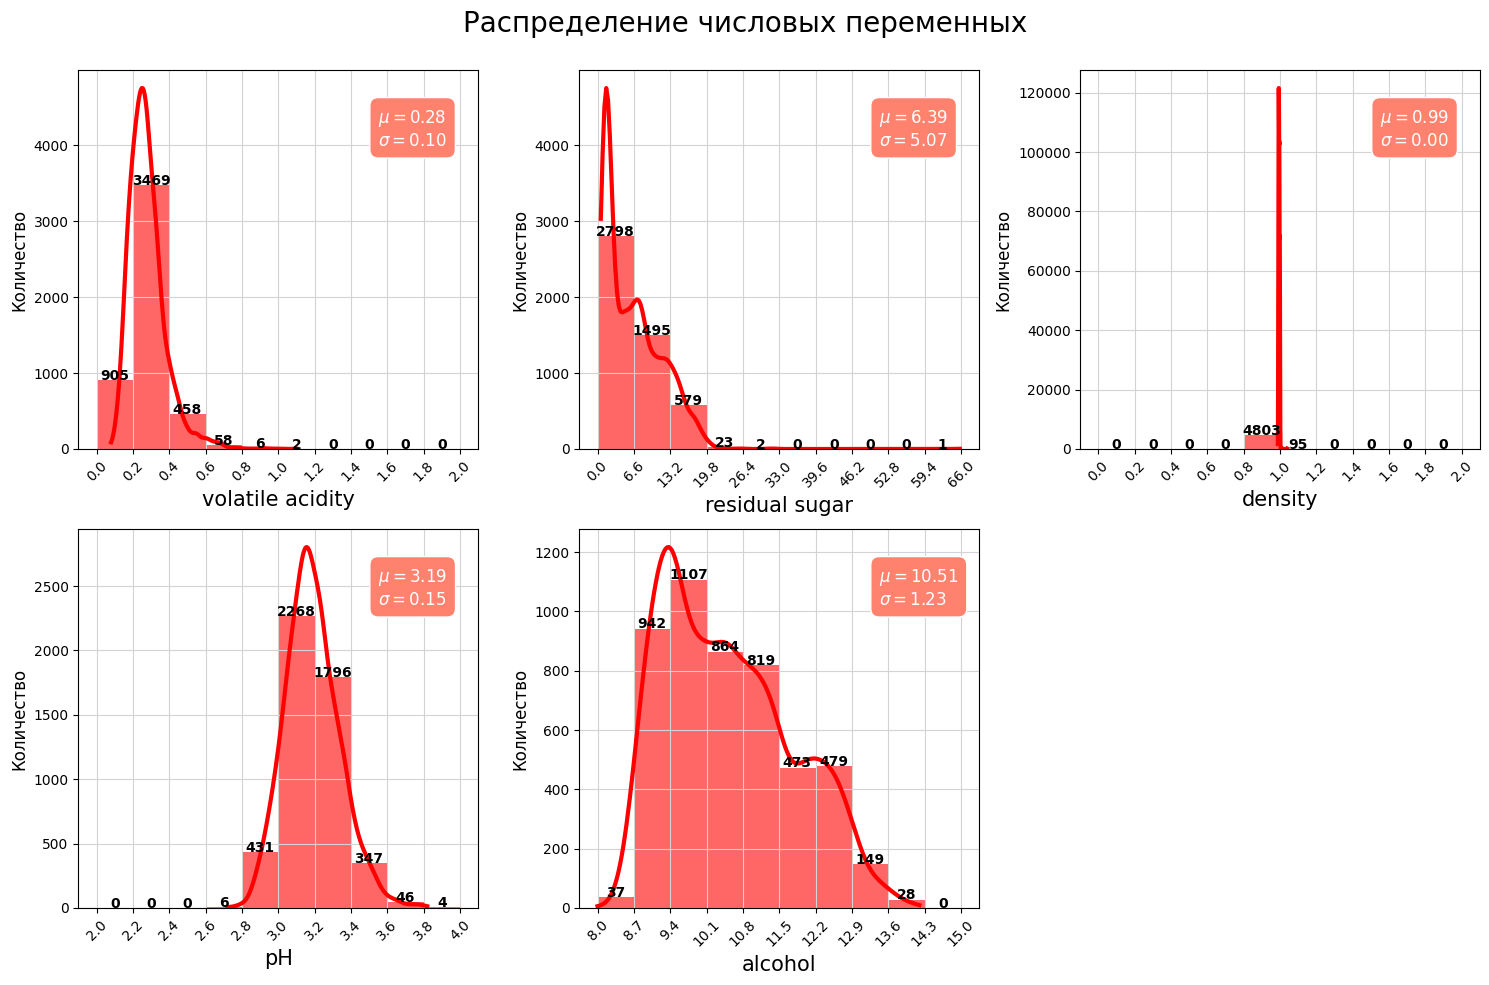

In [ ]:
# для непрерывных данных (летучая кислотность, сахар, плотность, кислотность, спирт)
# используем гистограммы и boxplot, чтобы получить представление о распределении каждого объекта

df_continuous_w = white_wine[continuous_features]

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого числового признака
for i, col in enumerate(df_continuous_w.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous_w[col],
                                     range=(np.floor(df_continuous_w[col].min()), np.ceil(df_continuous_w[col].max())))

    graph = sns.histplot(data=df_continuous_w, x=col, bins=bin_edges, kde=True, ax=ax[x, y],
                         edgecolor='none', color='red', alpha=0.6, line_kws={'lw': 3})
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')

    for j, p in enumerate(graph.patches):
        ax[x, y].annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height() + 1),
                          ha='center', fontsize=10, fontweight="bold")

    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous_w[col].mean(),
        r'$\sigma=%.2f$' % df_continuous_w[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

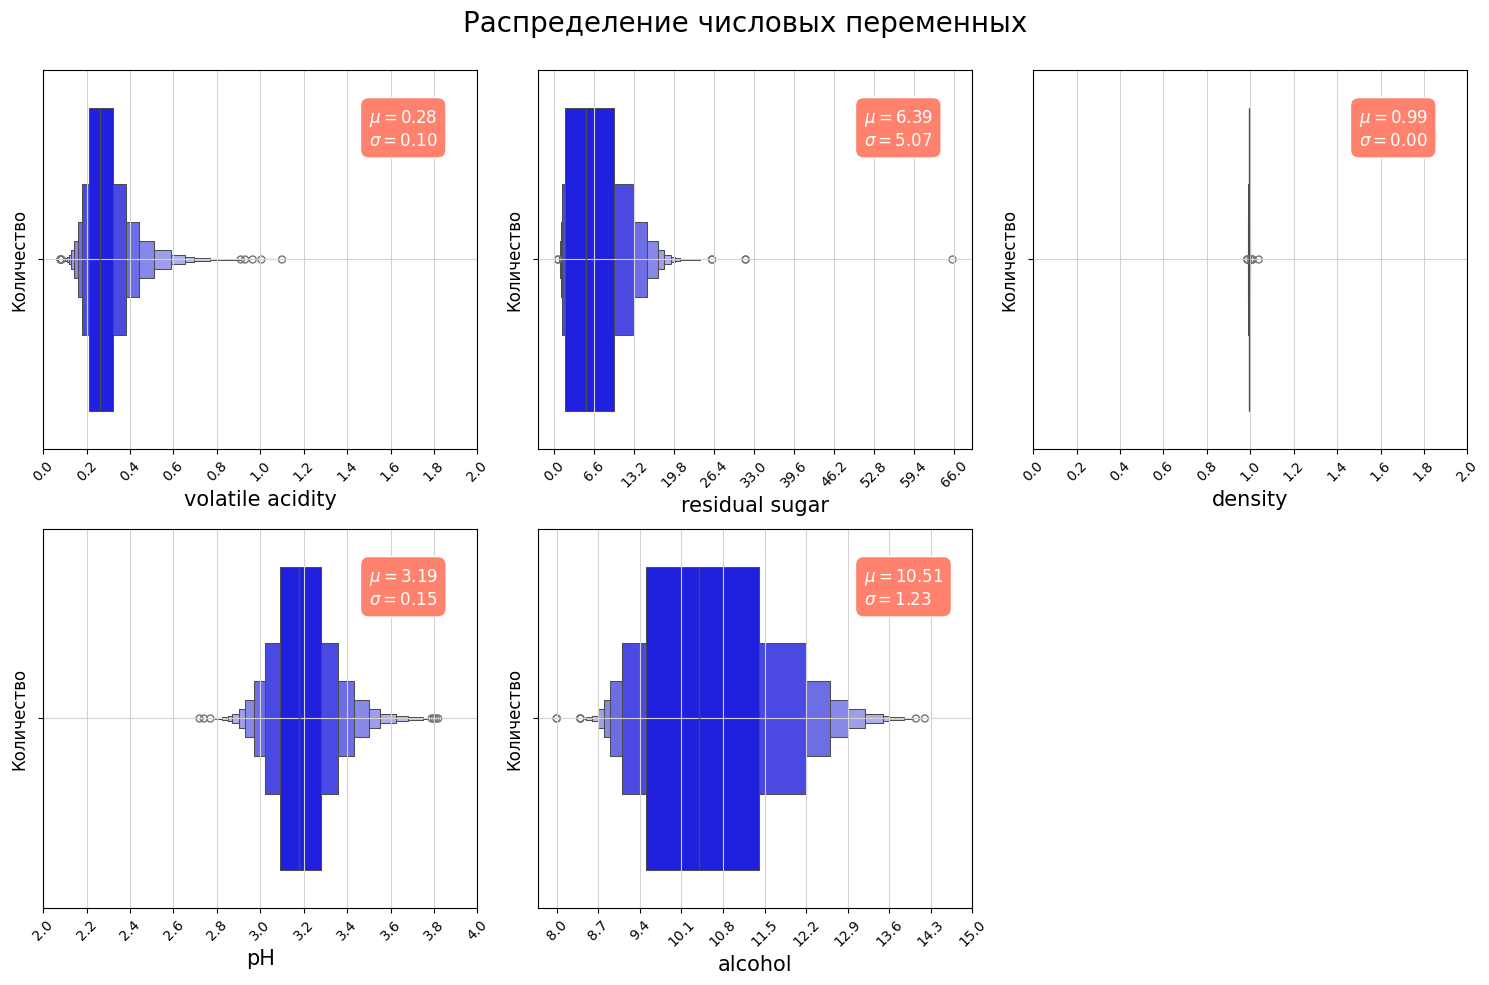

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

# Цикл для построения гистограмм для каждого непрерывного признака
for i, col in enumerate(df_continuous_w.columns):
    x = i // 3
    y = i % 3
    values, bin_edges = np.histogram(df_continuous_w[col],
                                     range=(np.floor(df_continuous_w[col].min()), np.ceil(df_continuous_w[col].max())))

    graph = sns.boxenplot(data=df_continuous_w, x=col, ax=ax[x, y],
                         color='blue')
    ax[x, y].set_xlabel(col, fontsize=15)
    ax[x, y].set_ylabel('Количество', fontsize=12)
    ax[x, y].set_xticks(np.round(bin_edges, 1))
    ax[x, y].set_xticklabels(ax[x, y].get_xticks(), rotation=45)
    ax[x, y].grid(color='lightgrey')


    textstr = '\n'.join((
        r'$\mu=%.2f$' % df_continuous_w[col].mean(),
        r'$\sigma=%.2f$' % df_continuous_w[col].std()
    ))
    ax[x, y].text(0.75, 0.9, textstr, transform=ax[x, y].transAxes, fontsize=12, verticalalignment='top',
                  color='white', bbox=dict(boxstyle='round', facecolor='#ff826e', edgecolor='white', pad=0.5))

ax[1,2].axis('off')
plt.suptitle('Распределение числовых переменных', fontsize=20)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

1. Первый график слева вверху показывает распределение переменной "volatile acidity", летучая кислотность у белых вин. Среднее значение µ = 0.28, стандартное отклонение σ = 0.10. Распределение с асимметрией вправо, превышение допустимого значения 0.8-1 г/л в одно значение может быть выбросом.

2. Второй график сверху посередине отображает распределение переменной "residual sugar" (остаточный сахар). Среднее значение составляет µ = 6.39, а стандартное отклонение — σ = 5.07. Большинство данных сосредоточено между 0 и 15, но есть несколько выбросов выше 25.

3. Третья диаграмма в верхнем правом углу представляет переменную "density" (плотность). Данные очень тесно сгруппированы и сосредоточены вокруг среднего значения - 1,0 и имеют очень малое стандартное отклонение.
Среднее значение равно 0.99, а стандартное отклонение - 0.00.

4. График нижний левый показывает переменную "pH" (кислотность). Здесь среднее µ = 3.19, стандартное отклонение σ = 0.15. Распределение симметричное, соответствующее нормальному распределению.

5. Нижний правый график иллюстрирует переменную "alcohol" (содержание спирта). Гистограмма показывает, что наиболее распространенное содержание алкоголя составляет около 10,51 при стандартном отклонении 1,23. Распределение несколько смещено вправо, что означает, что в нижней части распределения больше значений, чем в верхней. Есть несколько значений, которые намного превышают остальные, что может быть выбросами.

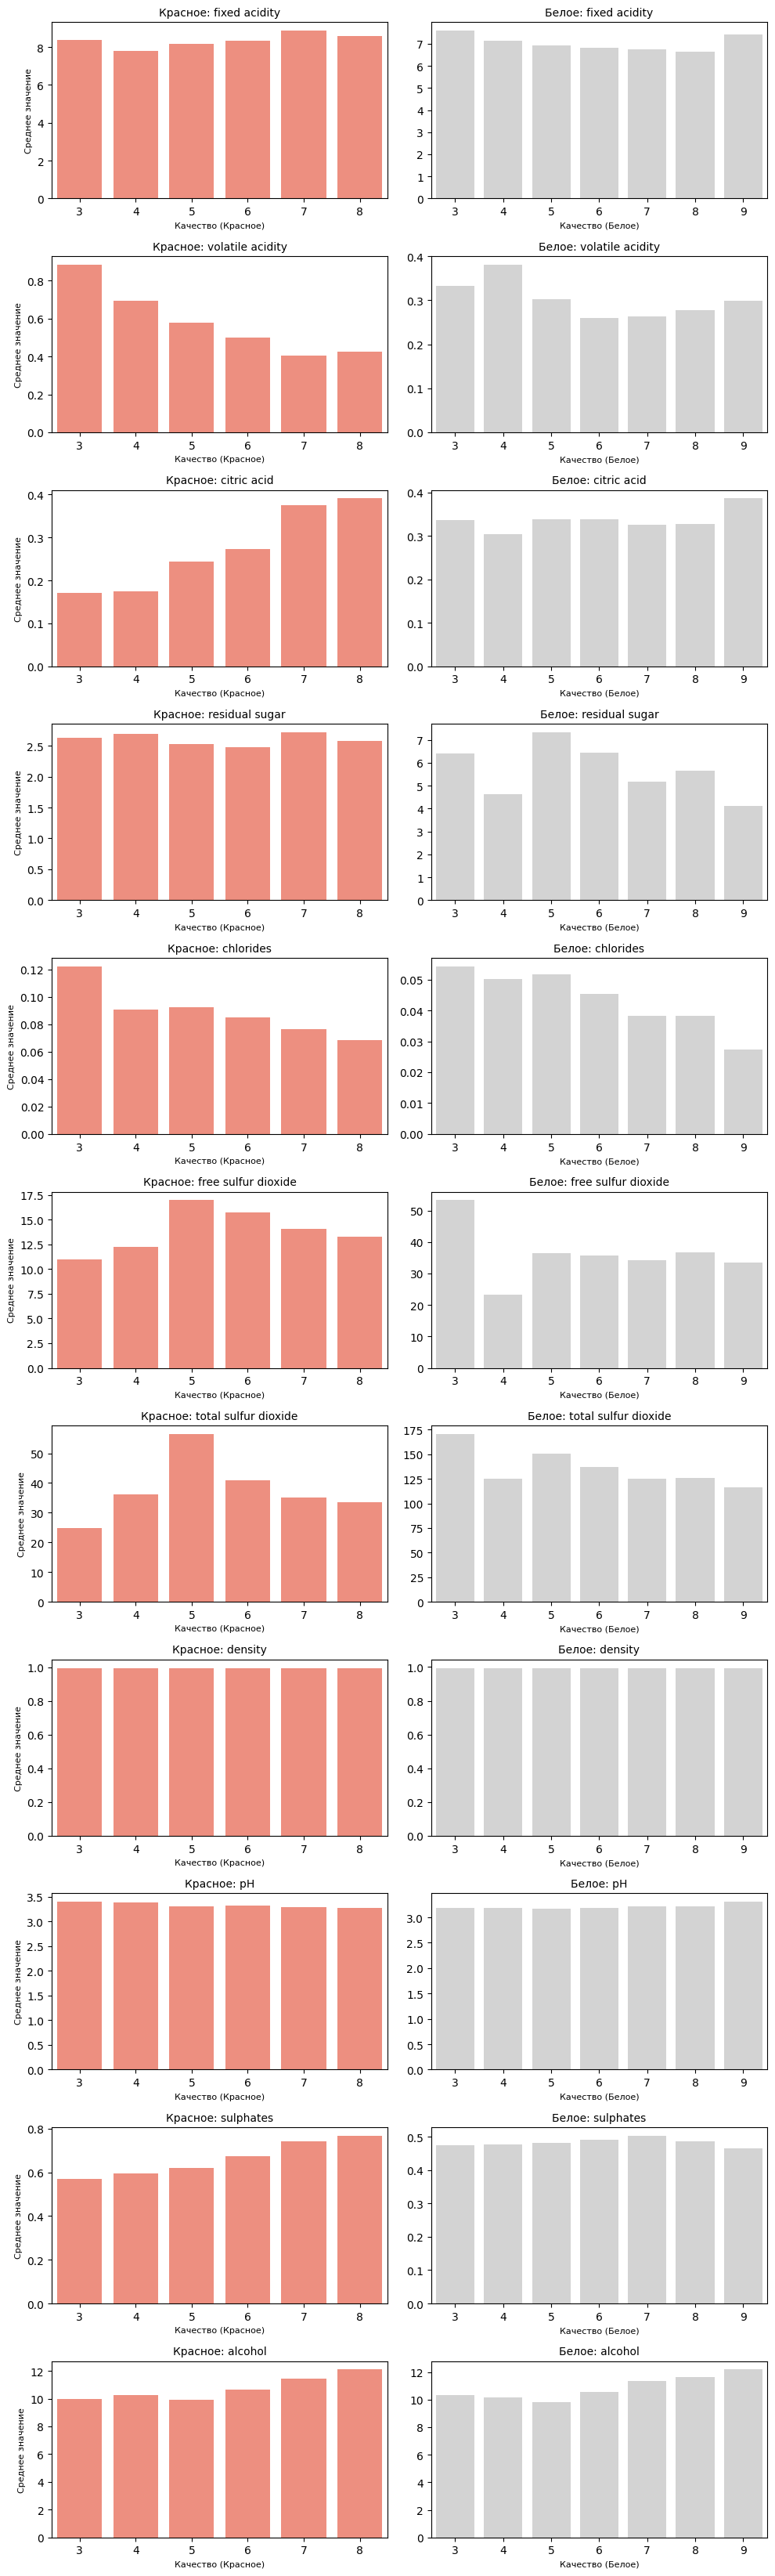

In [ ]:
# Наконец посмотрим на количественные признаки в сравнении с целевым распределением(оценка качества) красных и белых вин
sns.set_palette(['#ff826e', 'lightgrey'])

# Increased figure size to accommodate both datasets
fig, ax = plt.subplots(len(continuous_features), 2, figsize=(10, 3 * len(continuous_features)),
                       gridspec_kw={'width_ratios': [1, 1]})  # Equal width for both datasets

for i, col in enumerate(continuous_features):
    # Bar chart for red wine (left column)
    sns.barplot(x='quality', y=col, data=red_wine, ax=ax[i, 0], errorbar=None, color='#ff826e')
    ax[i, 0].set_xlabel('Качество (Красное)', fontsize=8)
    ax[i, 0].set_ylabel('Среднее значение', fontsize=8)
    ax[i, 0].set_title(f'Красное: {col}', fontsize=10)

    # Bar chart for white wine (right column)
    sns.barplot(x='quality', y=col, data=white_wine, ax=ax[i, 1], errorbar=None, color='lightgrey')
    ax[i, 1].set_xlabel('Качество (Белое)', fontsize=8)
    ax[i, 1].set_ylabel('')  # No need to repeat y-label
    ax[i, 1].set_title(f'Белое: {col}', fontsize=10)

plt.tight_layout()
plt.show()

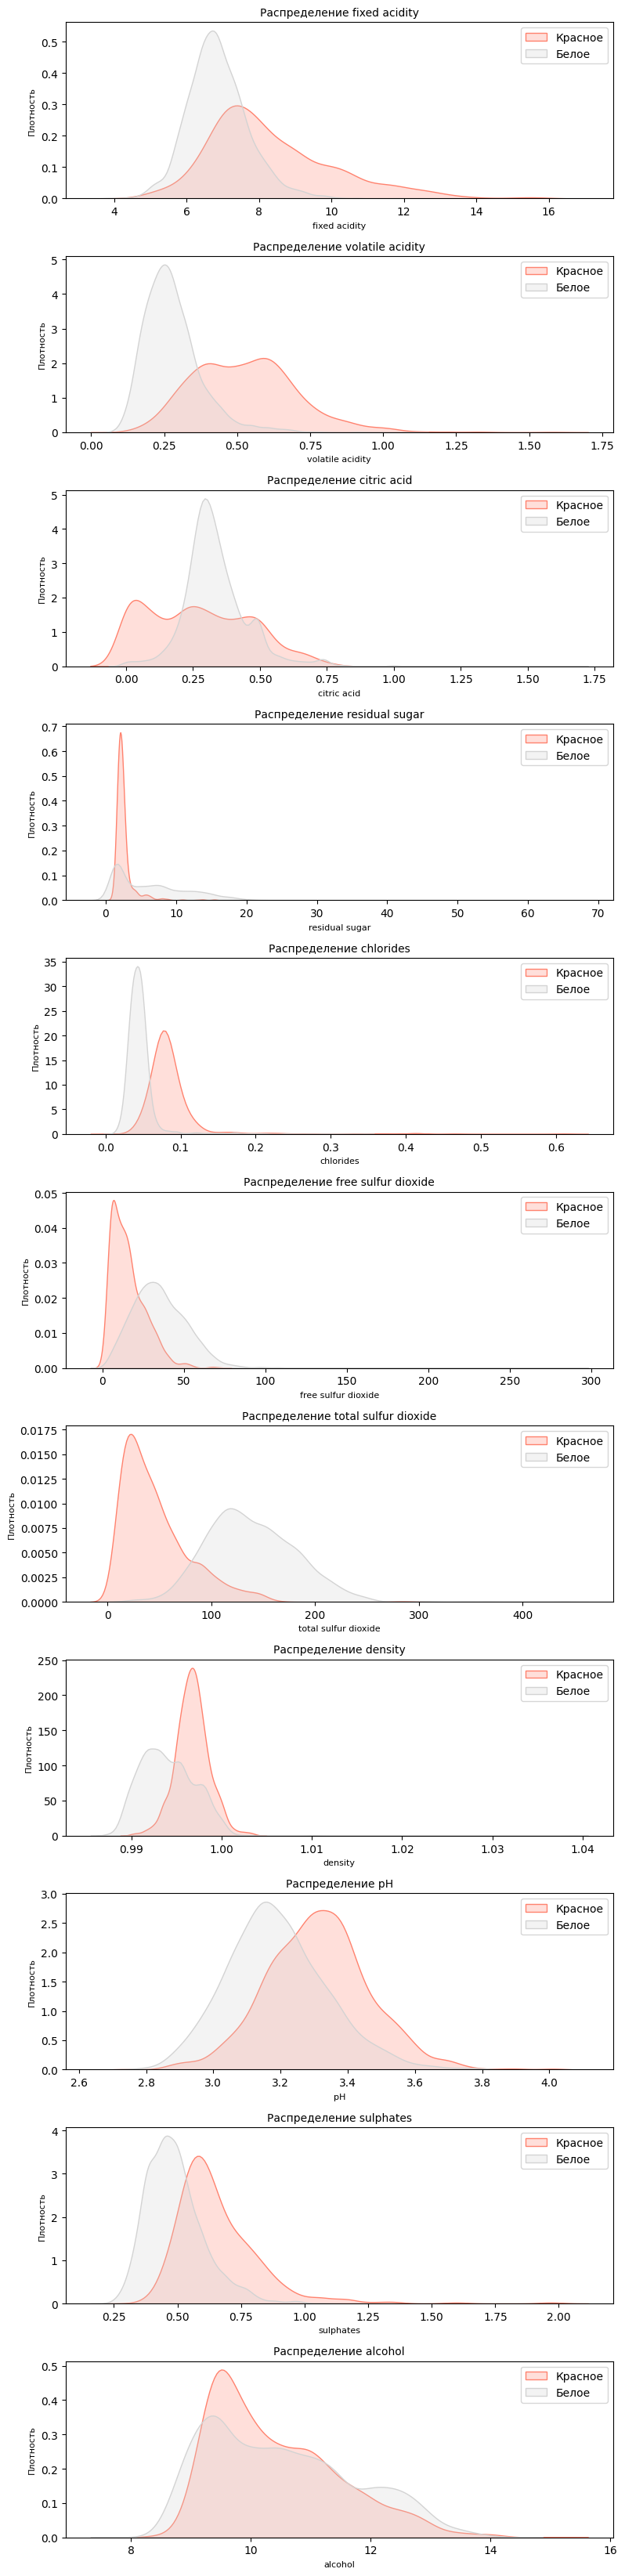

In [ ]:
sns.set_palette(['#ff826e', 'lightgrey'])

fig, ax = plt.subplots(len(continuous_features), 1, figsize=(8, 3 * len(continuous_features)))

for i, col in enumerate(continuous_features):
    # KDE plot for red wine
    sns.kdeplot(x=col, data=red_wine, fill=True, common_norm=False, ax=ax[i], color='#ff826e', label='Красное')

    # KDE plot for white wine (overlayed)
    sns.kdeplot(x=col, data=white_wine, fill=True, common_norm=False, ax=ax[i], color='lightgrey', label='Белое')

    ax[i].set_xlabel(col, fontsize=8)
    ax[i].set_ylabel('Плотность', fontsize=8)
    ax[i].set_title(f'Распределение {col}', fontsize=10)
    ax[i].legend()  # Simple legend to distinguish red and white

plt.tight_layout()
plt.show()

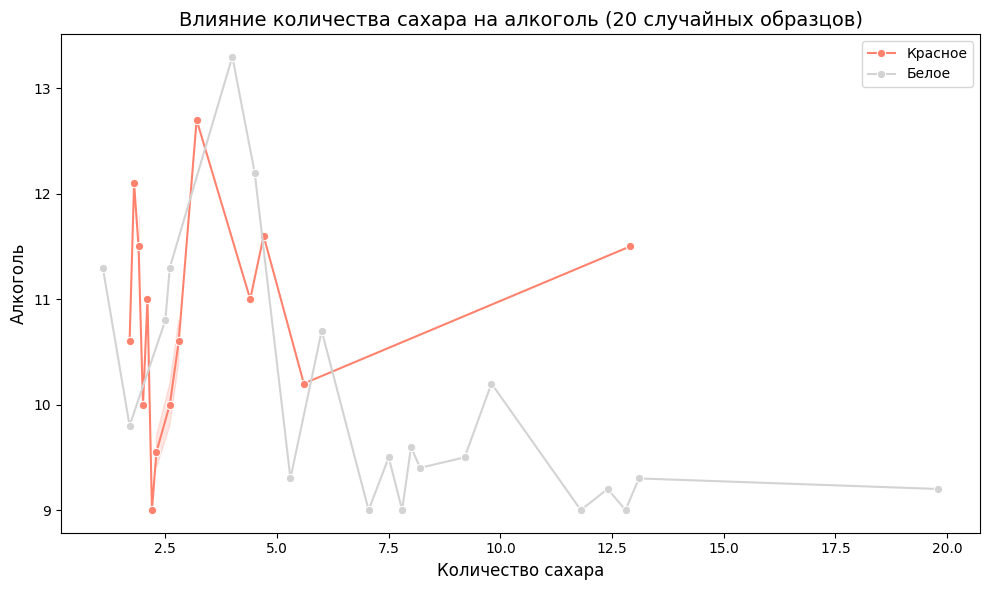

In [ ]:
# Cравним как влияет количества сахара на признак алкоголя для красного и белого вина
# Для наглядности возьмем 20 случайных значений
red_sample = red_wine.sample(20)
white_sample = white_wine.sample(20)

# для красного вина
plt.figure(figsize=(10, 6))
sns.lineplot(x='residual sugar', y='alcohol', data=red_sample, color='#ff826e', label='Красное', marker='o')

# для белого
sns.lineplot(x='residual sugar', y='alcohol', data=white_sample, color='lightgrey', label='Белое', marker='o')

plt.xlabel('Количество сахара', fontsize=12)
plt.ylabel('Алкоголь', fontsize=12)
plt.title('Влияние количества сахара на алкоголь (20 случайных образцов)', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()

Из графика видно, что между количеством сахара и содержанием алкоголя в красном и белом вине наблюдается различная зависимость. В красном вине содержание алкоголя увеличивается с увеличением количества сахара, а в белом вине эта зависимость менее выражена. Важно отметить, что это всего лишь 20 случайных образцов, поэтому для более точного анализа необходимы более обширные данные. Также на анализ могут повлиять выбросы и дубликаты которые нужно более тщательно исследовать